<a name="top"> <h1>00. Data Preprocessing</h1> <a>

<p>Análisis de sentimiento: Tweets<br />
<strong>Trabajo de Fin de Master</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>


<hr style="border:1px solid gray">

### Estructura

[Introducción](#introduccion) 

[1. Librerias utilizadas y funciones](#librerias) 

[2. Lectura de la base de datos ](#lectura) 

[3. Tokenización de los tweets ](#tokenizacion) 

   - 3.1 Conversión a lowercase
   - 3.2 Borrado de emoticonos
   - 3.3 Borrado de signos de puntuación y saltos de texto
   - 3.4 Tokenización y supresión de stopwords

[4. Transformación de las variables categóricas](#categoricas) 


[5. Wordcloud e histograma](#wordcloud) 

[6. Exportación del DF](#exportacion)

<hr style="border:1px solid gray">

# <a name="librerias"> 1. Librerias utilizadas y funciones <a>


Importamos las librerias a utilizar para el preprocesamiento:

In [8]:
# Import pandas.

import pandas as pd
import seaborn as sns

# Import nltk.

import nltk
nltk.download('punkt')

# Import nltk stopwords.

nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

# Import wordcloud and matplotlib.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vvict\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vvict\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# <a name="lectura"> 2. Lectura de la base de datos <a>


Procedemos a cargar la base de datos:

In [9]:
# Read csv file

tweets_df = pd.read_csv("../../data/raw/Tweets.csv")

# Print the shape of the dataframe.

print("The dataframe has {} rows and {} columns.".format(tweets_df.shape[0], tweets_df.shape[1]))


# Display first 5 rows

tweets_df.head()

The dataframe has 27481 rows and 4 columns.


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


### 2.1. Análisis Exploratorio

En primer lugar, observamos la forma del DF. El diccionario de datos se encuentra en `data`.

In [10]:
# Print the shape of the dataframe.

print("The dataframe has {} rows and {} columns.".format(tweets_df.shape[0], tweets_df.shape[1]))

The dataframe has 27481 rows and 4 columns.


In [11]:
# Print the column names and datatypes.

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [12]:
# Print the number of null values in each column.

tweets_df.isnull().sum()

# Delete the null values.

tweets_df.dropna(inplace = True)

In [13]:
# Comprobar filas duplicadas

tweets_df.duplicated().sum()

0

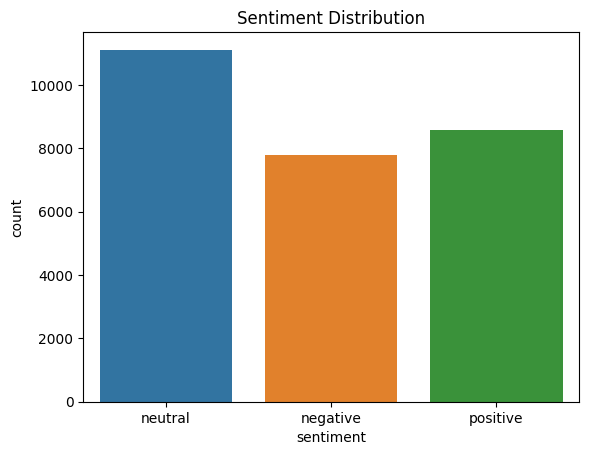

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [14]:
# Create an countplot using seaborn of tex variable.

sns.countplot(x='sentiment', data=tweets_df)

# Add title and labels.

plt.title('Sentiment Distribution')

# Show the plot.

plt.show()

# Print the number of sentiments.

tweets_df['sentiment'].value_counts()


Una vez importados los tweets, procedemos a quedarnos unicamente con el texto y el sentimiento.

In [15]:
# Select the text and sentiment columns.

text_df = tweets_df[['text', 'sentiment']]

# Display first 5 rows

text_df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


# <a name="tokenizacion"> 3. Tokenización de los tweets <a>


La tokenización de palabras es un proceso clave en el análisis de sentimiento de valoración de los tweets. Consiste en dividir un texto en palabras individuales para poder analizarlas de manera más efectiva.

En el caso de los tweets, que suelen ser mensajes cortos y con una gran cantidad de abreviaciones y jerga, la tokenización es aún más importante. Sin ella, el análisis de sentimiento podría verse afectado por la presencia de palabras combinadas o abreviaciones que no estarían siendo analizadas de manera individual.

La tokenización permite también la eliminación de palabras irrelevantes o stop words que no aportan información valiosa al análisis de sentimiento, lo que mejora la precisión de los resultados.

### 3.1 Conversión a lowercase


In [16]:
# Convert to lowercase the text column.

text_df['text'] = text_df['text'].str.lower()

# Display first 5 rows

text_df.head()

C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\2831228133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].str.lower()


,text,sentiment
0,"i`d have responded, if i were going",neutral
1,sooo sad i will miss you here in san diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"sons of ****, why couldn`t they put them on t...",negative


### 3.2 Borrado de usuarios


In [17]:
# Delete usernames.

text_df['text'] = text_df['text'].str.replace('@[^\s]+','')

# Display first 5 rows

text_df.head()

C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\971820549.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['text'] = text_df['text'].str.replace('@[^\s]+','')
C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\971820549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].str.replace('@[^\s]+','')


,text,sentiment
0,"i`d have responded, if i were going",neutral
1,sooo sad i will miss you here in san diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"sons of ****, why couldn`t they put them on t...",negative


### 3.3 Borrado de signos de puntuación y emojis <a>


In [18]:
# Delete the punctuation signs from text.

text_df['text'] = text_df['text'].str.replace('[^\w\s]','')

# Display first 5 rows

text_df.head()

C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\506099480.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['text'] = text_df['text'].str.replace('[^\w\s]','')
C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\506099480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].str.replace('[^\w\s]','')


,text,sentiment
0,id have responded if i were going,neutral
1,sooo sad i will miss you here in san diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,sons of why couldnt they put them on the rel...,negative


In [19]:
# Delete the emojis from text.

text_df['text'] = text_df['text'].str.replace('[^\x00-\x7F]+','')

# Display first 5 rows

text_df.head()

C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\2413006081.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['text'] = text_df['text'].str.replace('[^\x00-\x7F]+','')
C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\2413006081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].str.replace('[^\x00-\x7F]+','')


,text,sentiment
0,id have responded if i were going,neutral
1,sooo sad i will miss you here in san diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,sons of why couldnt they put them on the rel...,negative


In [20]:
# Delete links.

text_df['text'] = text_df['text'].str.replace('http\S+|www.\S+','')

# Display first 5 rows

text_df.head()

C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\1953472938.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['text'] = text_df['text'].str.replace('http\S+|www.\S+','')
C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\1953472938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].str.replace('http\S+|www.\S+','')


,text,sentiment
0,id have responded if i were going,neutral
1,sooo sad i will miss you here in san diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,sons of why couldnt they put them on the rel...,negative


### 3.4 Tokenización y supresión de stopwords <a>


In [21]:
import string

# Convert the text to string.

text_df['text'] = text_df['text'].astype(str)

translator = str.maketrans('', '', string.punctuation)
stopwords = nltk.corpus.stopwords.words('english')


text_df["SentimentText_clean"] = text_df.text.map(lambda x: x.strip().lower().translate(translator))
text_df["SentimentText_clean"].head()

C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\501980503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].astype(str)
C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\501980503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["SentimentText_clean"] = text_df.text.map(lambda x: x.strip().lower().translate(translator))


0                    id have responded if i were going
1           sooo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4    sons of  why couldnt they put them on the rele...
Name: SentimentText_clean, dtype: object

In [22]:
# Delete stopwords.

text_df['SentimentText_clean'] = text_df['SentimentText_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


# Display first 5 rows

text_df.head()

C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\3954303388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['SentimentText_clean'] = text_df['SentimentText_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


,text,sentiment,SentimentText_clean
0,id have responded if i were going,neutral,id responded going
1,sooo sad i will miss you here in san diego,negative,sooo sad miss san diego
2,my boss is bullying me,negative,boss bullying
3,what interview leave me alone,negative,interview leave alone
4,sons of why couldnt they put them on the rel...,negative,sons couldnt put releases already bought


# <a name="categoricas"> 4. Transformación de las variables categóricas <a>


Para poder realizar cualquier análisis estadístico o de machine learning sobre una columna de sentimiento que indica si un tweet es positivo, negativo o neutral, es necesario transformar las categorías en valores numéricos.

In [23]:
# Convert the sentiment column to numerical values.

text_df['sentiment'] = text_df['sentiment'].map({'neutral': 0, 'positive': 1, 'negative': 2})

# Display first 5 rows

text_df.head()

C:\Users\vvict\AppData\Local\Temp\ipykernel_9808\422321966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['sentiment'] = text_df['sentiment'].map({'neutral': 0, 'positive': 1, 'negative': 2})


,text,sentiment,SentimentText_clean
0,id have responded if i were going,0,id responded going
1,sooo sad i will miss you here in san diego,2,sooo sad miss san diego
2,my boss is bullying me,2,boss bullying
3,what interview leave me alone,2,interview leave alone
4,sons of why couldnt they put them on the rel...,2,sons couldnt put releases already bought


# <a name="wordcloud"> 5. Wordcloud e histograma de las palabras<a>


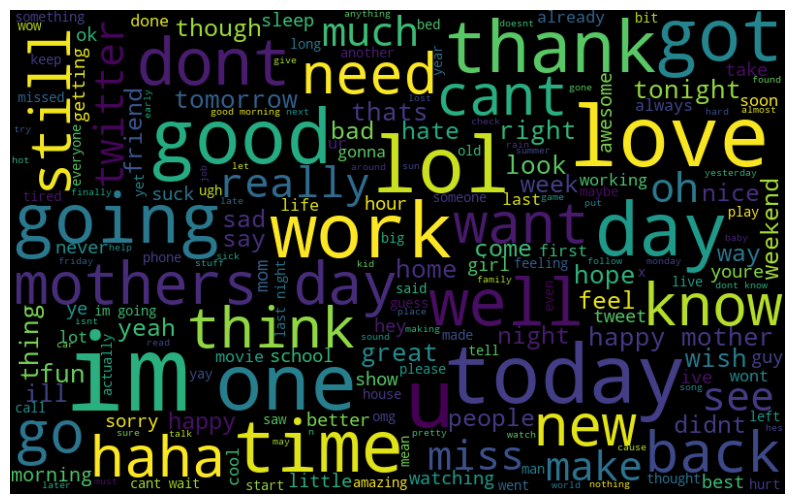

In [24]:
# Wordcloud of the most common words.

all_words = ' '.join([text for text in text_df['SentimentText_clean']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')

plt.show()




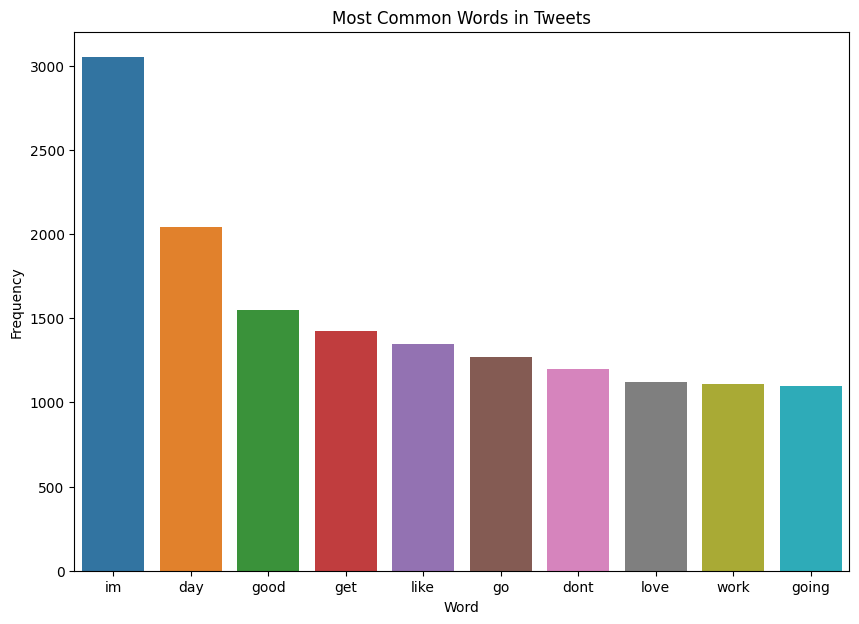

In [25]:
# Histogram of the most common words.

all_words = ' '.join([text for text in text_df['SentimentText_clean']])

all_words = all_words.split()

freq = Counter(all_words)

freq.most_common(20)

freq_df = pd.DataFrame(freq.most_common(10), columns=['Word', 'Frequency'])

freq_df.head()



plt.figure(figsize=(10, 7))

sns.barplot(x='Word', y='Frequency', data=freq_df)

plt.title("Most Common Words in Tweets")

plt.show()


# <a name="exportacion"> 6. Exportación del DF <a>


Procedemos a exportar el dataframe ya preprocesado para trabajar con modelos de ML

In [26]:
# Export as parquet the dataframe.

text_df.to_parquet("../../data/processed/tweets.parquet")